# Analysing crime in Ireland 2003-2019
## Observations
1. In general, reported crime drops between Q1-Q2, and Q2-Q3, but increases between Q3-Q4, and Q4-Q1.
2. Reported crime has generally been on the decrease, but since 2016 has slightly increased.
3. County Louth is the only county where the most reported offence is criminal damage.
4. North Dublin Metropolitan Region is the only area where the most reported offences are Offences while in custody or breach of court orders.
5. The county/region with the least reported crime is Longford/Roscommon.

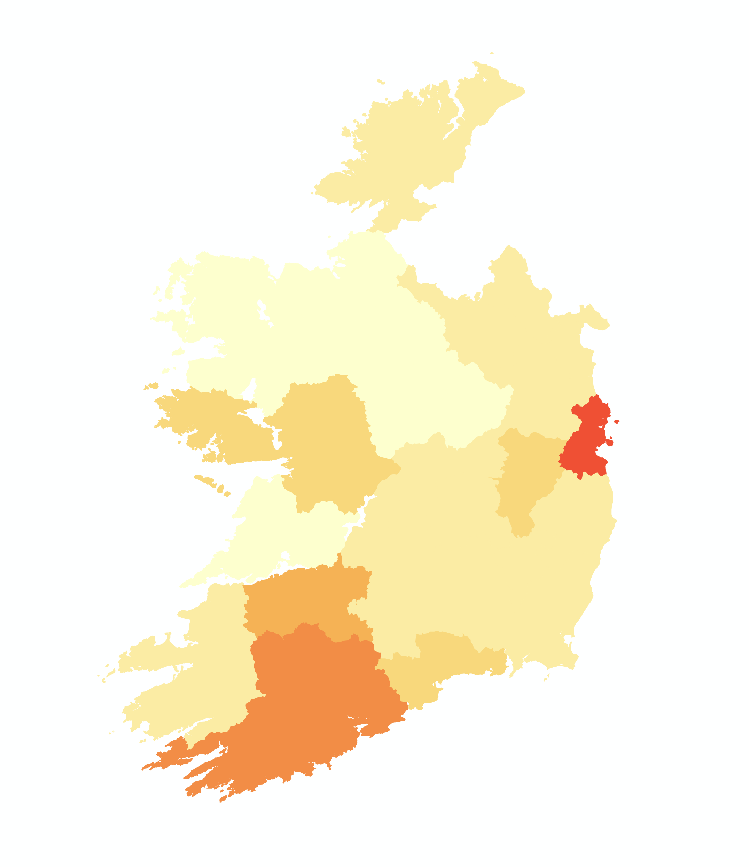

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
data = pd.read_csv("/kaggle/input/crime-in-ireland/IRELAND_CRIME_GARDA_DIVISION_wise_2003-2019.csv")

# Crimes in Ireland each quarter

In [ ]:
def line_plot(*args, **kwargs):
    plt.plot(args[0], args[1])
    plt.title(kwargs['title'])
    plt.xlabel(kwargs['xlabel'])
    plt.ylabel(kwargs['ylabel'])
    plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

quarterly_crimes = data[data.columns[5:]].sum()
line_plot(quarterly_crimes.index, quarterly_crimes.tolist(), title = 'Crimes per quarter', xlabel = 'quarter', ylabel = 'no. crimes')

In [ ]:
no_crimes_yearly = [sum(quarterly_crimes[i:i+4]) for i in range(0, len(quarterly_crimes), 4)] 
years = range(2003, 2020)

line_plot(years[0:len(years)-1], no_crimes_yearly[0:len(no_crimes_yearly)-1], title = 'Crimes per year', xlabel = 'year', ylabel = 'no. crimes')  # skip 2019 because in this set 2019 does not have its 4th quarter yet

# Average change in crime between quarters
We see overall crime in Ireland drops in Q1-Q2, and Q2-Q3, but generally increases from there on, with the biggest rise occuring between Q4-Q1.

In [ ]:
quarterly_differences = [quarterly_crimes[i-1] - quarterly_crimes[i] for i in range(1, len(quarterly_crimes))] 
avg_quarterly_differences = [sum(quarterly_differences[i::4]) / len(quarterly_differences[i::4]) for i in range(0,4)]

interquarters = ['Q1-Q2', 'Q2-Q3', 'Q3-Q4', 'Q4-Q1']
line_plot(interquarters, avg_quarterly_differences, title='Average quarterly differences', xlabel='Quarters', ylabel='Difference')

In [ ]:
print(sum(quarterly_crimes[0::4]) / len(quarterly_crimes[0::4]))
print(sum(quarterly_crimes[1::4]) / len(quarterly_crimes[1::4]))
print(sum(quarterly_crimes[2::4]) / len(quarterly_crimes[2::4]))
print(sum(quarterly_crimes[3::4]) / len(quarterly_crimes[3::4]))

# Which counties have the most crime?

In [ ]:
regional_crimes = data.groupby(['REGION']).sum()
regional_crimes.drop('OFFENCE CODE', axis=1, inplace=True)
regional_crimes.sum(axis=1)

# Average quarterly no. crimes per county

In [ ]:
divisional_crimes = data.groupby(['GARDA DIVISION']).sum()
divisional_crimes.drop('OFFENCE CODE', axis=1, inplace=True)
divisional_crimes.sum(axis=1) / len(divisional_crimes.columns)

# Each county's proportion of national crime between 2003-2019

In [ ]:
divisional_crime_ranking = divisional_crimes.sum(axis=1) / divisional_crimes.sum(axis=1).sum()
divisional_crime_ranking.sort_values(ascending=False)

In [ ]:
divisional_crime_ranking.sort_values(ascending=False).plot.bar()

**I guess living in Longford has its perks...**

# 25 Most common recorded crimes in Ireland 2003-2019

In [ ]:
national_offence_counts = data.groupby('OFFENCE').sum().drop('OFFENCE CODE', axis=1).sum(axis=1)
national_offence_counts.sort_values(ascending=False)[:25].plot.barh()
plt.show()

In [ ]:
national_offence_counts[:10]

In [ ]:
data[data.columns[5:]].sum(axis=1)

# Most common offences by County/Area 2003-2019

In [ ]:
crime_no_per_county = data[data.columns[5:]].sum(axis=1)
crime_no_per_county = crime_no_per_county.rename('COUNT')
crime_no_per_county = crime_no_per_county.to_frame()
crime_no_per_county['OFFENCE'] = data['OFFENCE']
crime_no_per_county['GARDA DIVISION'] = data['GARDA DIVISION']
idx = crime_no_per_county.groupby('GARDA DIVISION')['COUNT'].transform(max) == crime_no_per_county['COUNT']
crime_no_per_county[idx]